Data after imputation:
   target               a         b   c                  d          e  \
0     0.0  lv hypertrophy  0.531368  63       fixed defect  Cleveland   
1     1.0  lv hypertrophy -1.056253  67             normal  Cleveland   
2     1.0  lv hypertrophy  0.438407  67  reversable defect  Cleveland   
3     0.0          normal -1.413430  37             normal  Cleveland   
4     0.0  lv hypertrophy -1.347216  41             normal  Cleveland   

          f                g      h      i  ...          r       s    t  \
0  0.285812   typical angina  233.0   True  ...  60.627689    Male  2.3   
1  1.660947     asymptomatic  286.0  False  ...  65.225088    Male  1.5   
2 -0.305235     asymptomatic  229.0  False  ...  66.956699    Male  2.6   
3  0.887054      non-anginal  250.0  False  ...  37.160246    Male  3.5   
4 -0.558037  atypical angina  204.0  False  ...  41.359067  Female  1.4   

           u      v         w    x          y         z      {  
0  62.306825  145.0 -1

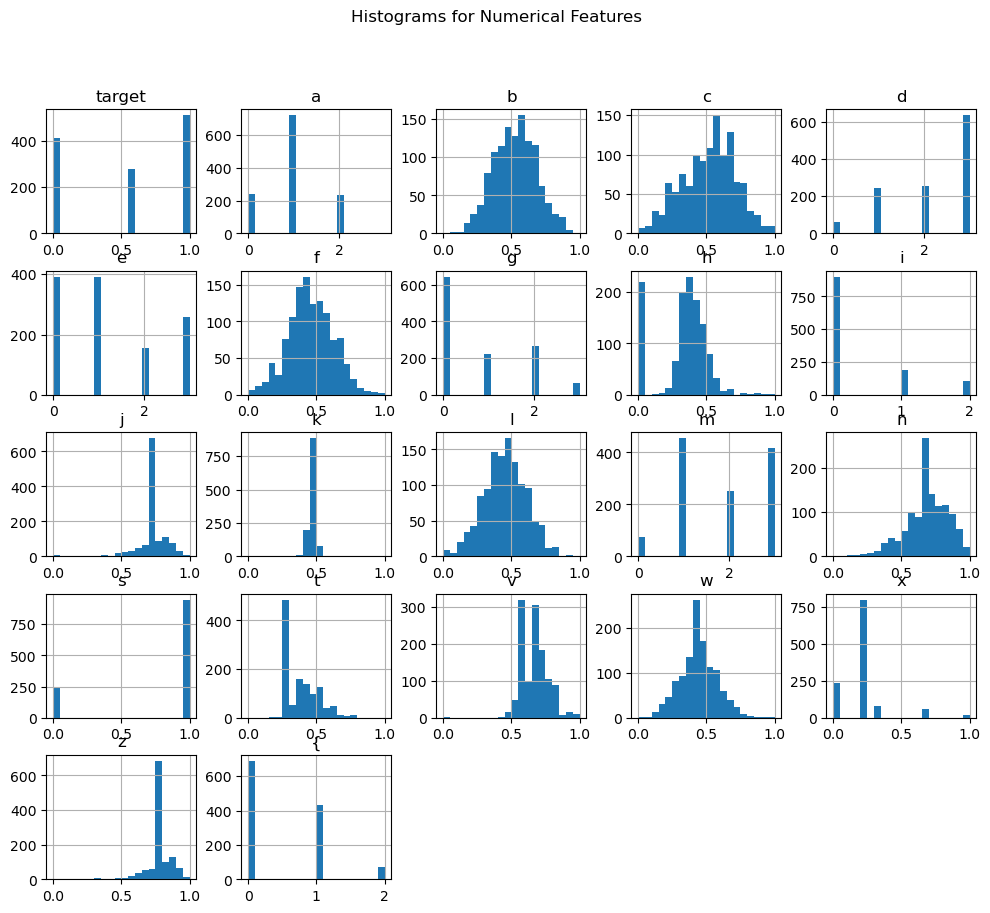

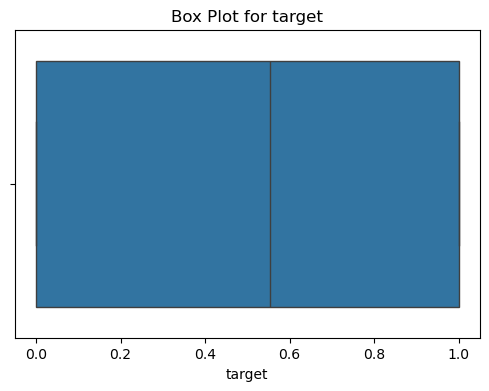

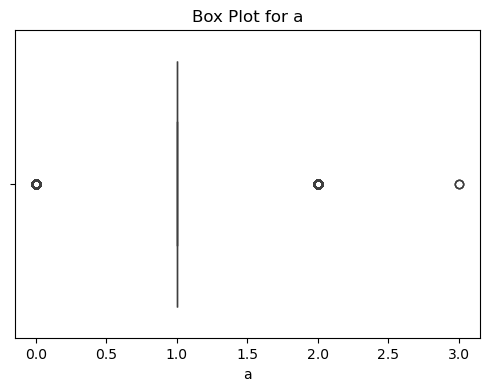

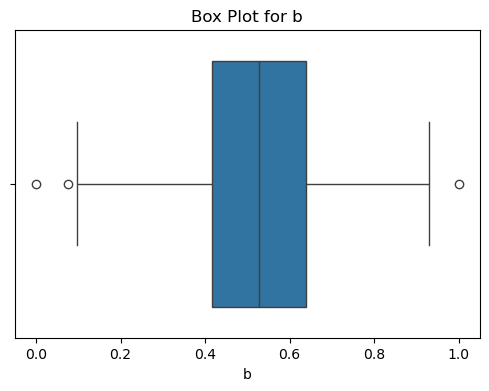

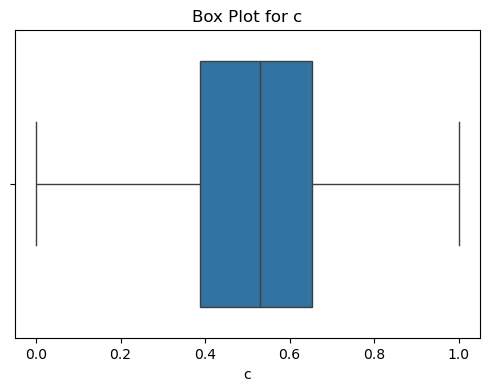

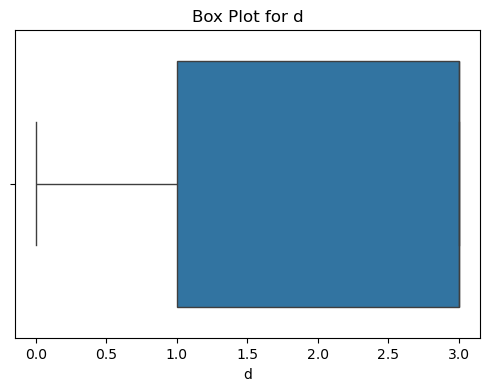

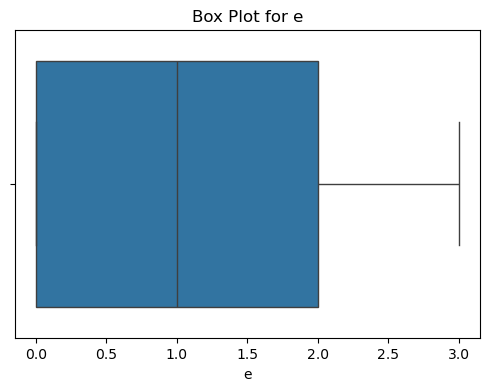

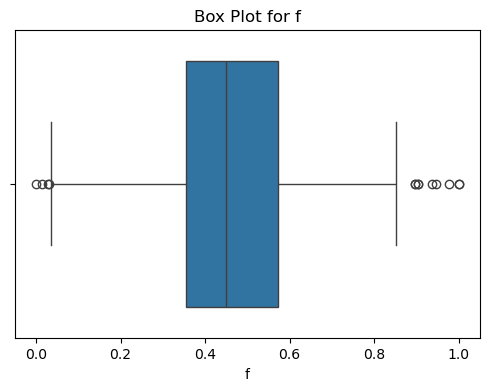

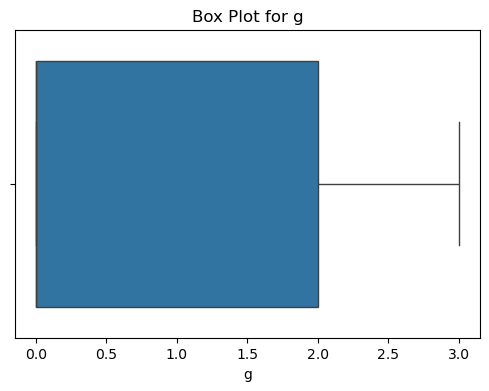

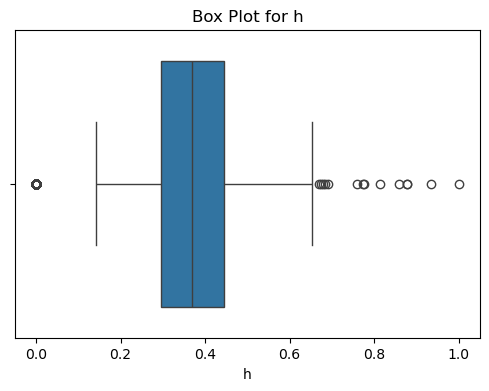

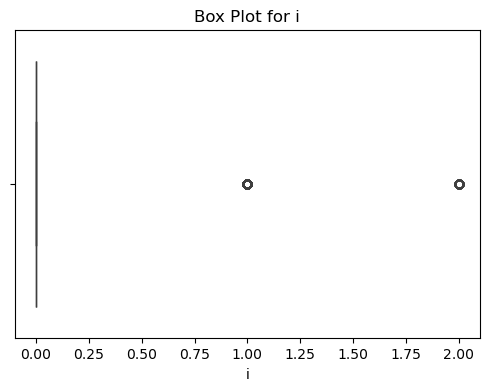

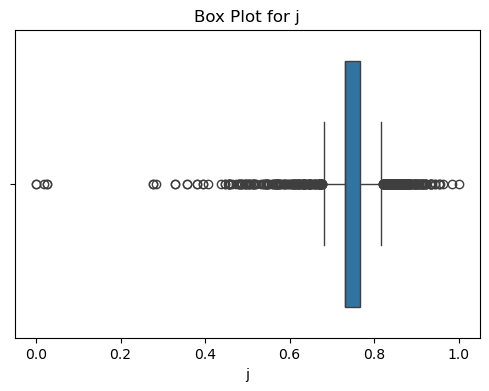

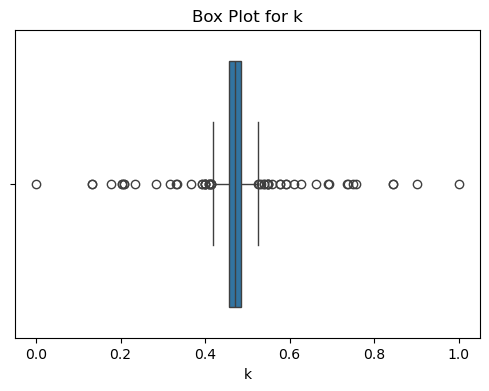

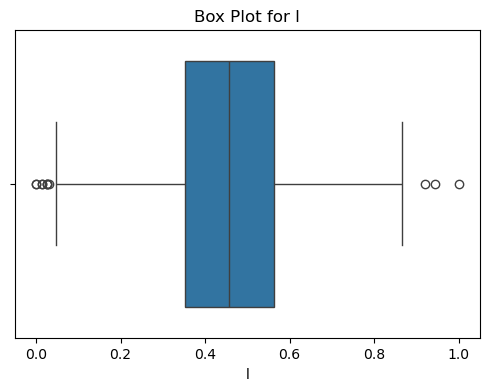

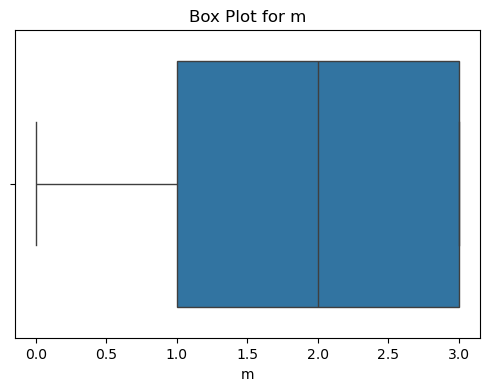

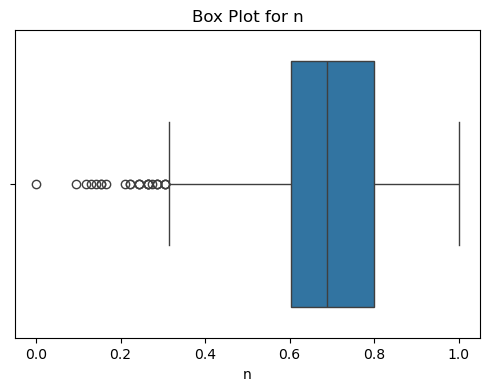

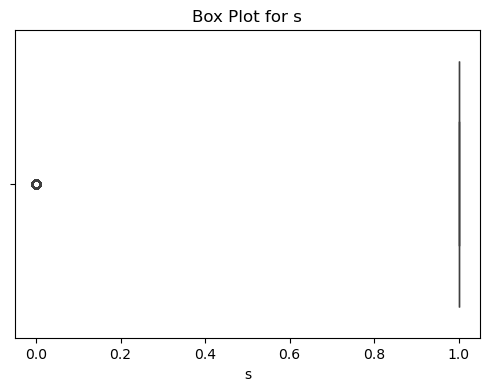

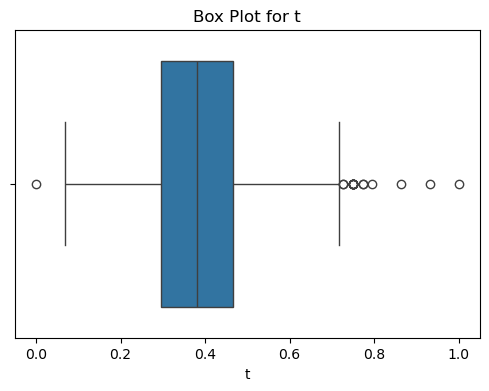

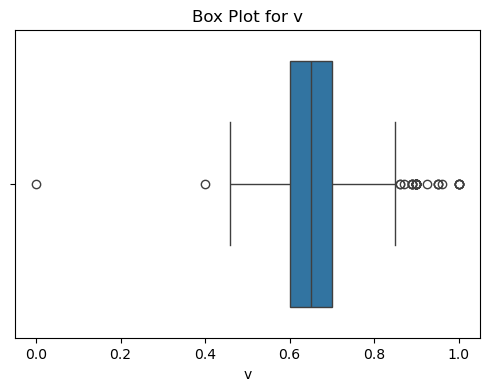

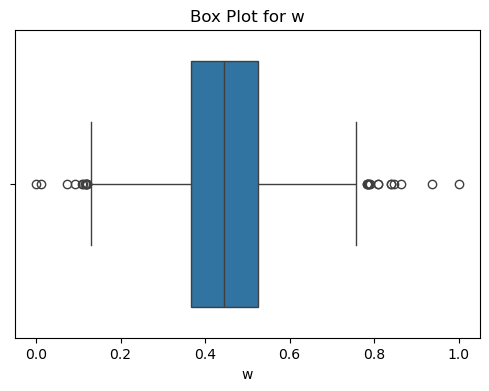

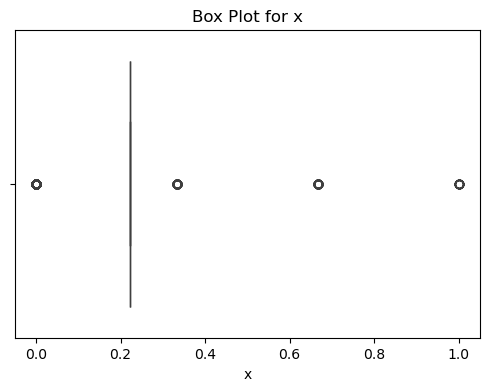

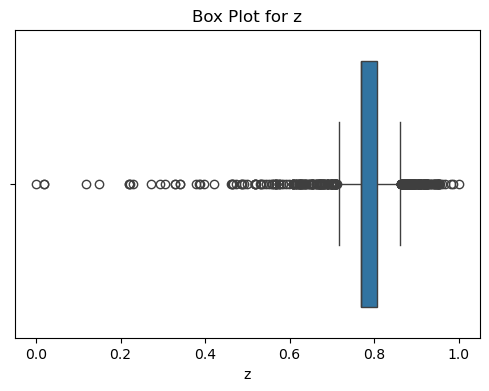

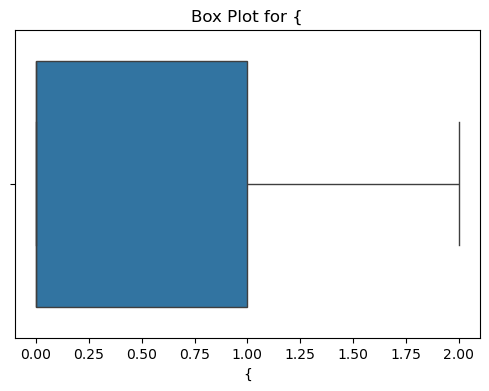

Mean Squared Error: 0.1397
R-squared: 0.2815


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import data_preprocessor as dp

# 1. Load the dataset
messy_data = pd.read_csv('../Data/messy_data.csv')
clean_data = messy_data.copy()

# 2. Preprocess the data
clean_data = dp.impute_missing_values(clean_data, strategy='mean')
clean_data = dp.remove_duplicates(clean_data)
clean_data = dp.normalize_data(clean_data)
clean_data = dp.remove_redundant_features(clean_data)

# 3. Encode categorical variables
# Check for categorical columns (excluding target column if necessary)
categorical_cols = clean_data.select_dtypes(include=['object']).columns

# Apply Label Encoding for columns with categorical data (for target column or ordinal features)
label_encoder = LabelEncoder()
for col in categorical_cols:
    clean_data[col] = label_encoder.fit_transform(clean_data[col])

# 4. Visualizations: Histograms and Box Plots
numerical_cols = clean_data.select_dtypes(include=['number']).columns

# Plotting histograms
clean_data[numerical_cols].hist(bins=20, figsize=(12, 10), grid=True)
plt.suptitle('Histograms for Numerical Features')
plt.show()

# Plotting box plots to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=clean_data[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

# 5. Save the cleaned dataset
clean_data.to_csv('../Data/clean_data.csv', index=False)

# 6. Train and evaluate the model using the simple_model function
def simple_model(data):
    # Assuming 'target' is the column to predict
    X = data.drop('target', axis=1)  # Features
    y = data['target']  # Target

    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model using Mean Squared Error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R-squared: {r2:.4f}')

# Call the model function
simple_model(clean_data)
